<a href="https://colab.research.google.com/github/Archin0/PCVK_Sem5/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Langkah 1: Menghubungkan Google Drive dan Membaca Gambar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tampilan dengan Matplotlib (BGR):


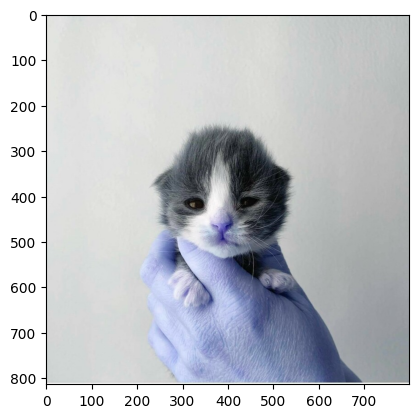

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Ganti dengan path file gambar Anda di Google Drive
file_path = '/content/drive/MyDrive/PCVK/ilham.jpg'
img = cv.imread(file_path)

# Menampilkan gambar menggunakan matplotlib (warna akan salah karena BGR)
print("Tampilan dengan Matplotlib (BGR):")
plt.imshow(img)
plt.show() # Menggunakan plt.show() untuk memisahkan output

## Langkah 2 & 3: Manipulasi Dasar Gambar (Warna, Grayscale, Resize, Flip)

Tampilan dengan Matplotlib setelah konversi ke RGB:


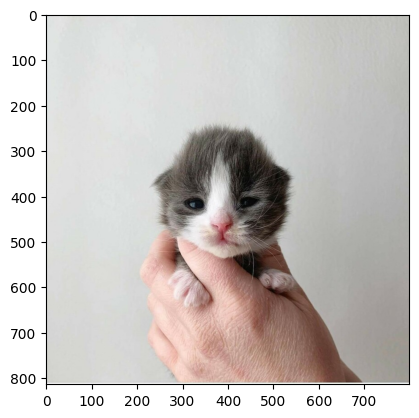

In [4]:
# Konversi dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print("Tampilan dengan Matplotlib setelah konversi ke RGB:")
plt.imshow(img_rgb)
plt.show()

Tampilan Grayscale (default colormap):


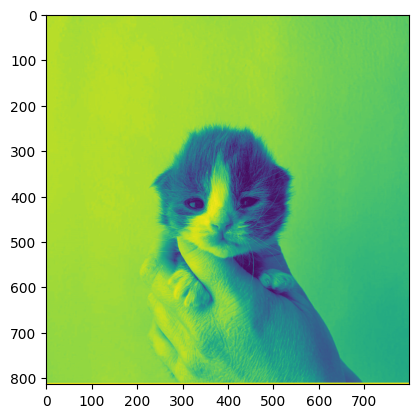

Tampilan Grayscale (colormap 'gray'):


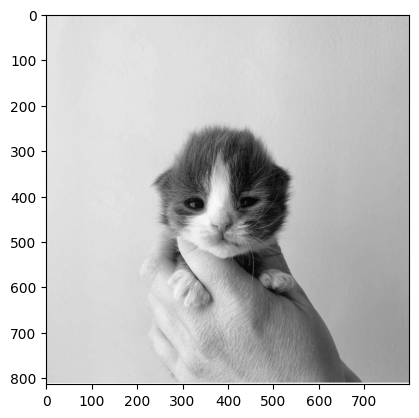

Tampilan Grayscale (colormap 'magma'):


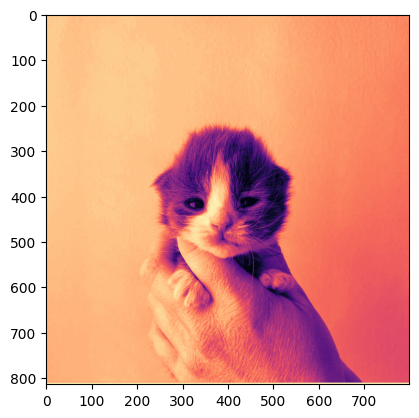

In [5]:
# Membaca gambar langsung sebagai grayscale
img_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

print("Tampilan Grayscale (default colormap):")
plt.imshow(img_gray)
plt.show()

print("Tampilan Grayscale (colormap 'gray'):")
plt.imshow(img_gray, cmap='gray')
plt.show()

print("Tampilan Grayscale (colormap 'magma'):")
plt.imshow(img_gray, cmap='magma')
plt.show()

Gambar setelah di-resize:


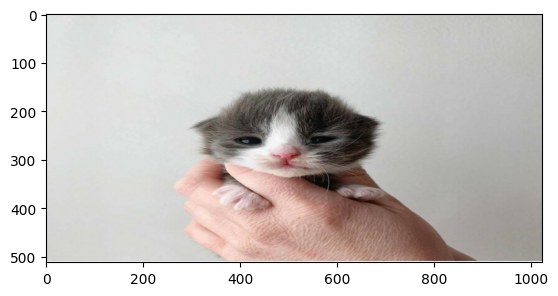

Gambar setelah dibalik (flipped):


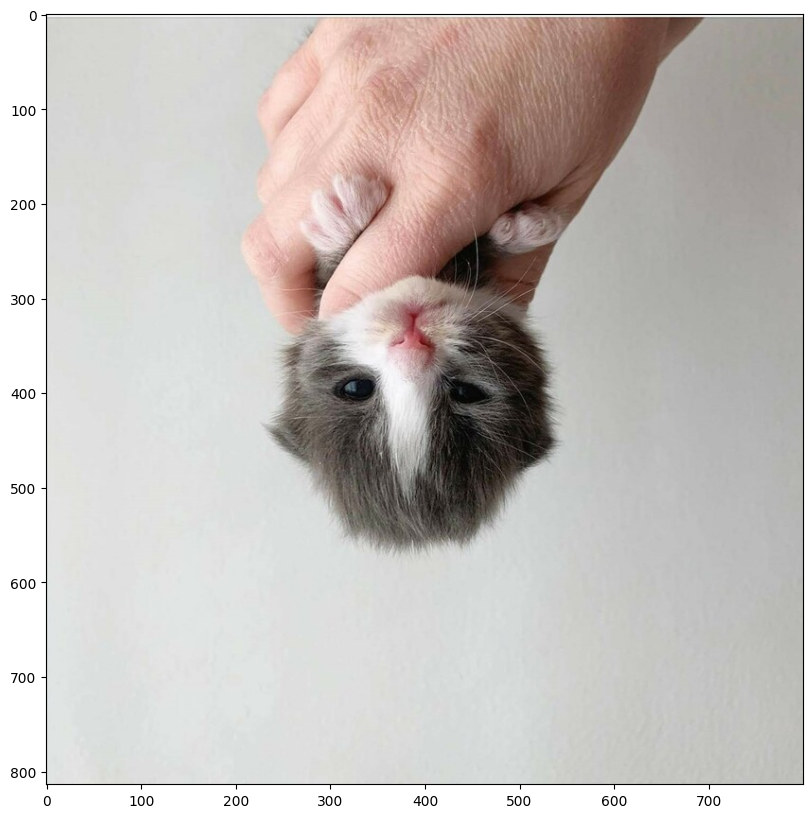

In [6]:
# Resize gambar RGB ke ukuran 1024x512 piksel
img_resized = cv.resize(img_rgb, (1024, 512))

# Membalik gambar RGB secara vertikal (flip code 0)
img_flipped = cv.flip(img_rgb, 0)

print("Gambar setelah di-resize:")
plt.imshow(img_resized)
plt.show()

print("Gambar setelah dibalik (flipped):")
# Mengatur ukuran kanvas tampilan agar lebih besar
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img_flipped)
plt.show()

## Langkah 4: Menggambar Bentuk Geometris

Gambar HITAM:


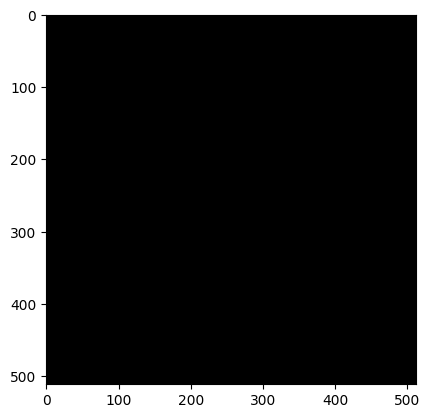

Gambar HITAM dengan persegi panjang hijau:


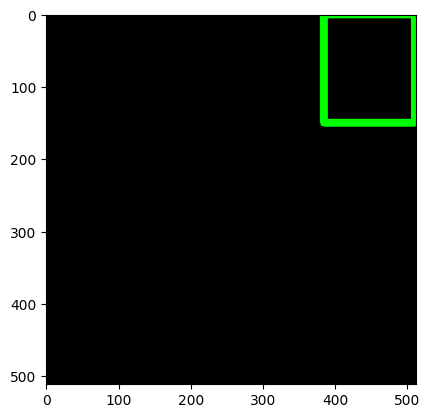

Ditambah persegi biru:


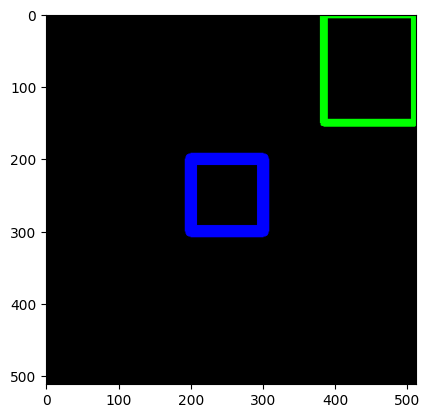

Ditambah lingkaran merah:


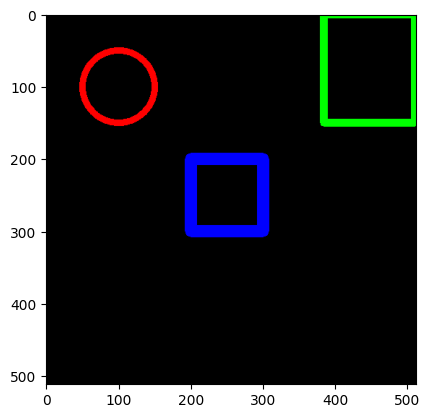

Ditambah garis diagonal biru:


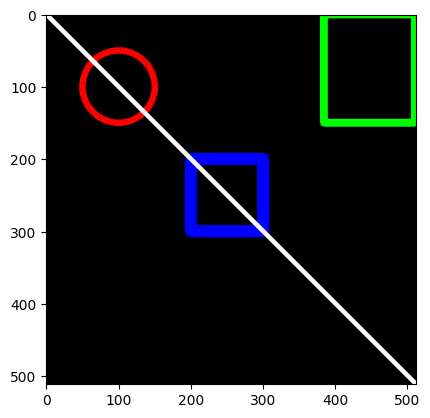

Ditambah teks:


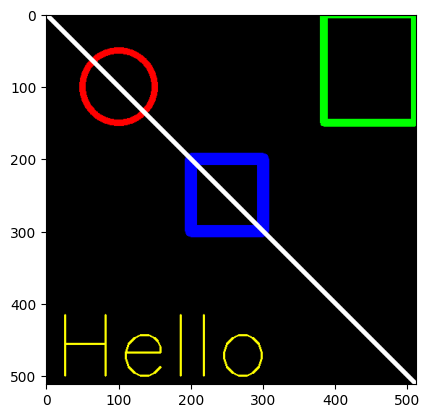

In [9]:
# Membuat gambar hitam ukuran 512x512
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
print("Gambar HITAM:")
plt.imshow(black_img)
plt.show()

# Menggambar persegi panjang hijau (ketebalan 10)
cv.rectangle(black_img, pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)
print("Gambar HITAM dengan persegi panjang hijau:")
plt.imshow(black_img)
plt.show()

# Menggambar persegi biru (ketebalan 15)
cv.rectangle(black_img, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)
print("Ditambah persegi biru:")
plt.imshow(black_img)
plt.show()

# Menggambar lingkaran merah (ketebalan 8)
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
print("Ditambah lingkaran merah:")
plt.imshow(black_img)
plt.show()

# Menggambar garis diagonal putih (ketebalan 5)
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)
print("Ditambah garis diagonal biru:")
plt.imshow(black_img)
plt.show()

# Menambahkan teks
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10,500), fontFace=font, fontScale=4, color=(255,255,0), thickness=2, lineType=cv.LINE_AA)
print("Ditambah teks:")
plt.imshow(black_img)
plt.show()

Gambar HITAM 2:


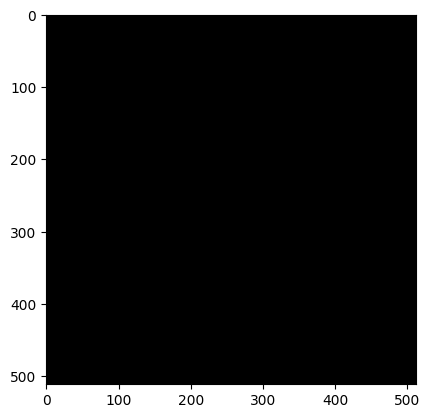

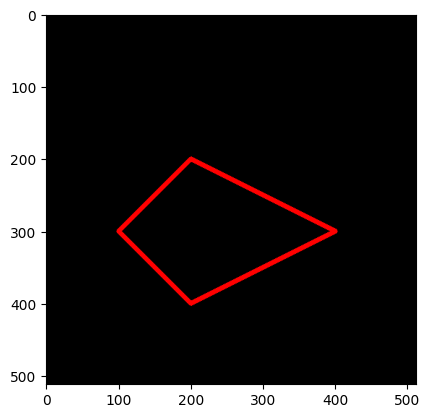

In [13]:
# Membuat gambar hitam ukuran 512x512
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
print("Gambar HITAM 2:")
plt.imshow(black_img2)
plt.show()

vertices = np.array([[100,300],[200,200],[400,300],[200,400]], dtype=np.int32)
vertices

pts = vertices.reshape((-1,1,2))

cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)
plt.show()